In [27]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, sys, datetime as dt, warnings

%matplotlib inline
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
warnings.filterwarnings(action='ignore')

program_path = './data/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx'
submission_path = './data/02_평가데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx'

# Import Data

In [28]:
df_raw = pd.read_excel(program_path, header=1)
df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


# EDA

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


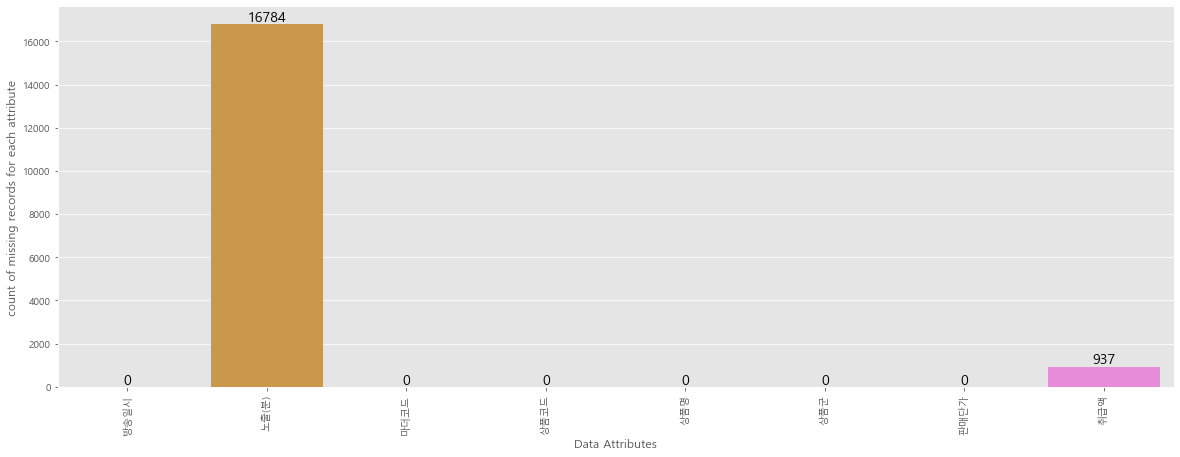

In [30]:
# 결측치 확인
# 결측치 시각화
x = df_raw.columns
y = df_raw.isnull().sum()

plt.figure(figsize=(20,7))
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
#sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [31]:
df_raw['방송일시'].dtype

dtype('<M8[ns]')

In [32]:
# 연속형 변수 추출
numeric_cols = []
for col in df_raw.columns:
    if df_raw[col].dtype not in ['object', 'datetime64[ns]']:
        numeric_cols.append(col)
numeric_cols

['노출(분)', '마더코드', '상품코드', '판매단가', '취급액']

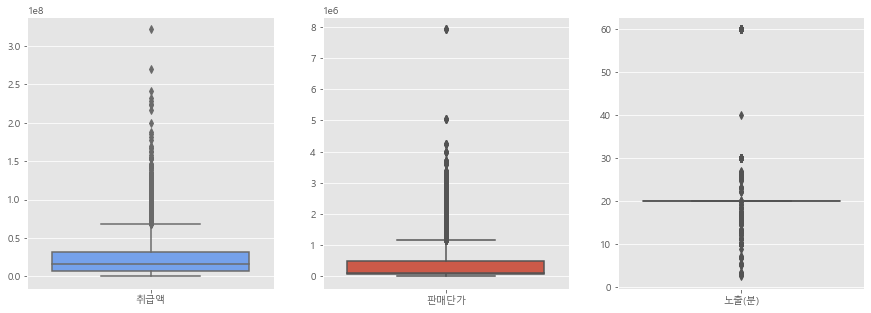

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(data=df_raw[['취급액']], ax=ax[0], color=color_pal[6])
sns.boxplot(data=df_raw[['판매단가']], ax=ax[1])
sns.boxplot(data=df_raw[['노출(분)']], ax=ax[2])

In [34]:
df_raw.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액'], dtype='object')

## 방송일시

In [35]:
df = df_raw.copy()

In [36]:
df['date'] = df['방송일시'].dt.date

In [37]:
df_raw['방송일시'].dtype

dtype('<M8[ns]')

## 노출(분)

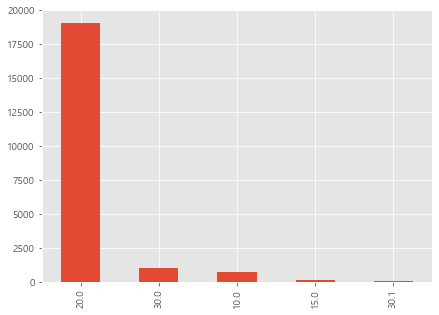

In [81]:
df['노출(분)'].value_counts().head().plot(kind='bar', figsize=(7,5))

count    21525.000000
mean        20.174664
std          3.633757
min          2.466667
25%         20.000000
50%         20.000000
75%         20.000000
max         60.000000
Name: 노출(분), dtype: float64


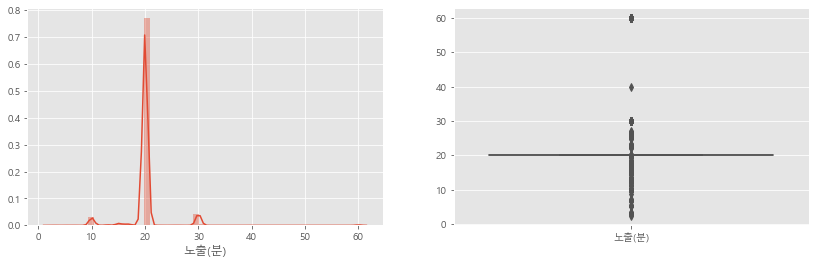

In [73]:
print(df_raw['노출(분)'].describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.distplot(df_raw['노출(분)'], ax=ax[0])
sns.boxplot(data=df_raw[['노출(분)']], ax=ax[1])

In [39]:
# 노출 시간이 20분 보다 크거나 작은 데이터 추출
not20 = df_raw[(df_raw['노출(분)'] > 20) | (df_raw['노출(분)'] < 20)]
not20

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
23,2019-01-01 13:00:00,30.000000,100305,200970,오모떼 360도 텐션업 레이스 패키지 시즌4,속옷,109000,32273000.0
24,2019-01-01 13:30:00,30.000000,100305,200970,오모떼 360도 텐션업 레이스 패키지 시즌4,속옷,109000,79273000.0
25,2019-01-01 14:00:00,30.000000,100377,201220,그렉노먼 남성 구스다운 롱 벤치코트,의류,119000,11269000.0
27,2019-01-01 14:30:00,30.000000,100377,201220,그렉노먼 남성 구스다운 롱 벤치코트,의류,119000,40526000.0
53,2019-01-01 22:00:00,30.000000,100271,200896,헤스티지 엘레나 라쿤양가죽 콤비 롱코트,의류,299000,38067000.0
...,...,...,...,...,...,...,...,...
38160,2019-12-30 12:10:00,10.000000,100063,200153,대동모피 패션밍크 후드 롱코트 (19FW),의류,690000,37594000.0
38179,2019-12-30 18:20:00,60.000000,100072,200194,"삼성화재 천만안심 건강보험(암보험, 1907)",무형,0,NaN
38208,2019-12-31 01:40:00,17.166667,100439,201357,루시헨느 레이스 홀리데이 란쥬 패키지,속옷,89900,22453000.0
38243,2019-12-31 13:20:00,60.000000,100072,200194,"삼성화재 천만안심 건강보험(암보험, 1907)",무형,0,NaN


In [40]:
not20['상품군'].unique()

array(['속옷', '의류', '생활용품', '잡화', '농수축', '주방', '이미용', '무형', '건강기능', '가전',
       '가구', '침구'], dtype=object)

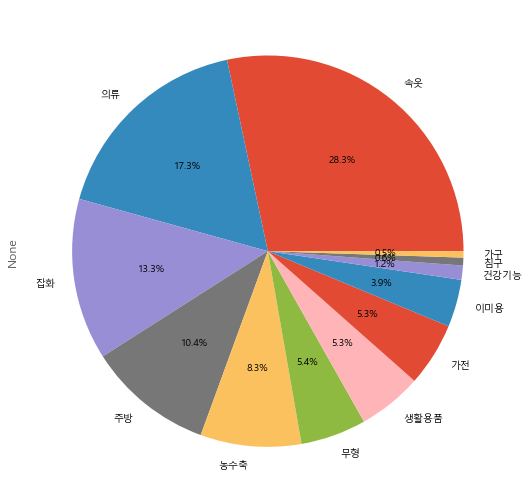

In [41]:
df_count = not20.groupby(["상품군"]).size().sort_values(ascending=False)
df_count.plot.pie(figsize = (9,9), autopct = "%.1f%%") 

## 상품군

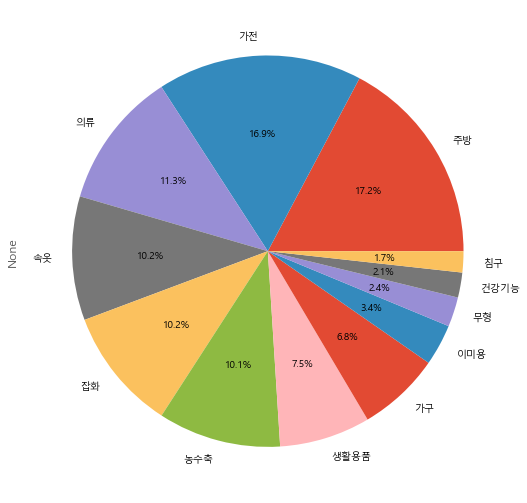

In [42]:
df_raw.groupby(['상품군']).size().sort_values(ascending=False).plot.pie(figsize = (9,9), autopct = "%.1f%%")

- 상품군의 종류를 살펴보면 주방과 가전 상품이 가장 많다.
- 의류, 속옷, 잡화, 농수축은 거의 비슷한 비율을 구성하고 있다.
- 가장 낮은 것은 침구이다.

## 판매단가

count    3.830900e+04
mean     4.565537e+05
std      7.260555e+05
min      0.000000e+00
25%      5.900000e+04
50%      1.090000e+05
75%      4.990000e+05
max      7.930000e+06
Name: 판매단가, dtype: float64


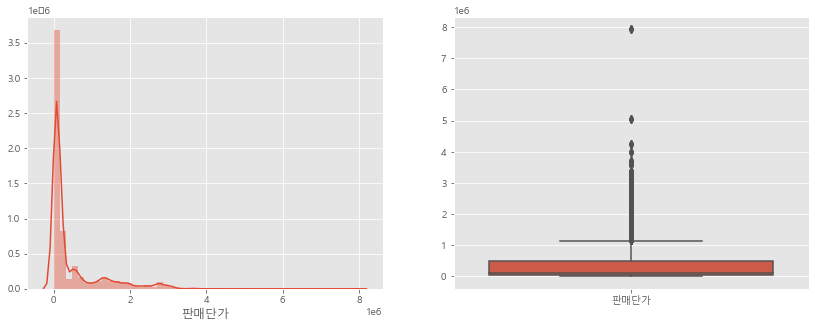

In [43]:
print(df_raw['판매단가'].describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.distplot(df_raw['판매단가'], ax=ax[0])
sns.boxplot(data=df_raw[['판매단가']], ax=ax[1])

## 취급액

count    3.737200e+04
mean     2.187305e+07
std      2.019140e+07
min      5.000000e+04
25%      6.880750e+06
50%      1.612950e+07
75%      3.163125e+07
max      3.220090e+08
Name: 취급액, dtype: float64


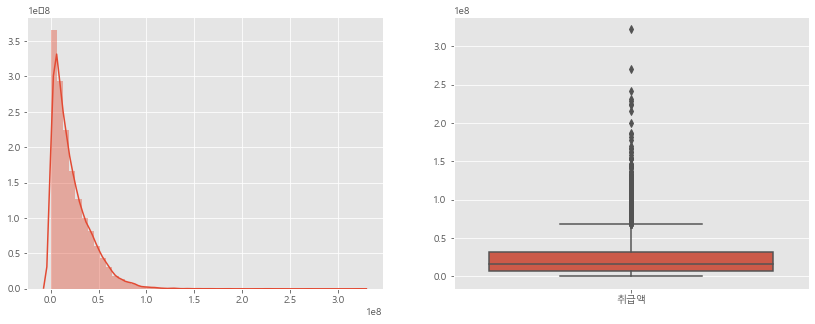

In [44]:
print(df_raw['취급액'].describe())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.distplot(df_raw[['취급액']], ax=ax[0])
sns.boxplot(data=df_raw[['취급액']], ax=ax[1])

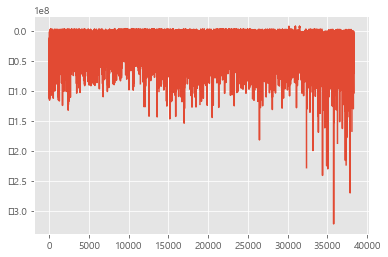

In [45]:
tmp=df_raw['판매단가']-df_raw['취급액']
tmp.plot()

In [53]:
df['판매수량'] = round(df['취급액'] / df['판매단가'],0)

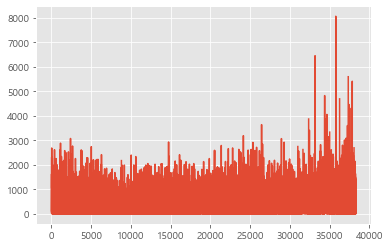

In [54]:
df['판매수량'].plot()

# 상관분석

In [60]:
df.corr()

,노출(분),마더코드,상품코드,판매단가,취급액,판매수량
노출(분),1.000000,0.076084,0.068873,0.077033,0.144171,0.001517
마더코드,0.076084,1.000000,0.975614,-0.215932,-0.029025,0.012170
상품코드,0.068873,0.975614,1.000000,-0.230717,-0.015692,0.023004
판매단가,0.077033,-0.215932,-0.230717,1.000000,-0.248520,-0.380800
취급액,0.144171,-0.029025,-0.015692,-0.248520,1.000000,0.770115
판매수량,0.001517,0.012170,0.023004,-0.380800,0.770115,1.000000


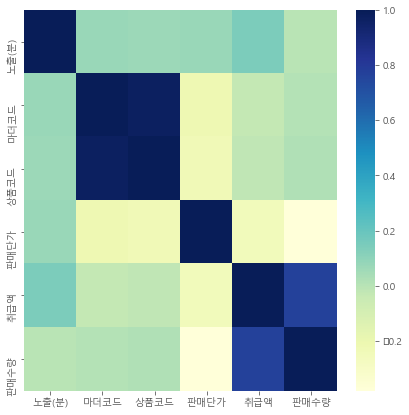

In [56]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),cmap='YlGnBu', fmt='.1g')

## 날짜 별 취급액

In [57]:
# 일 별 취급액
tmp = df.groupby(['date'])[['취급액']].mean().reset_index()
# 일 별 편성 건수
tmp1 = df.groupby(['date']).size()

Text(0.5, 1.0, '날짜 별 편성 건수')

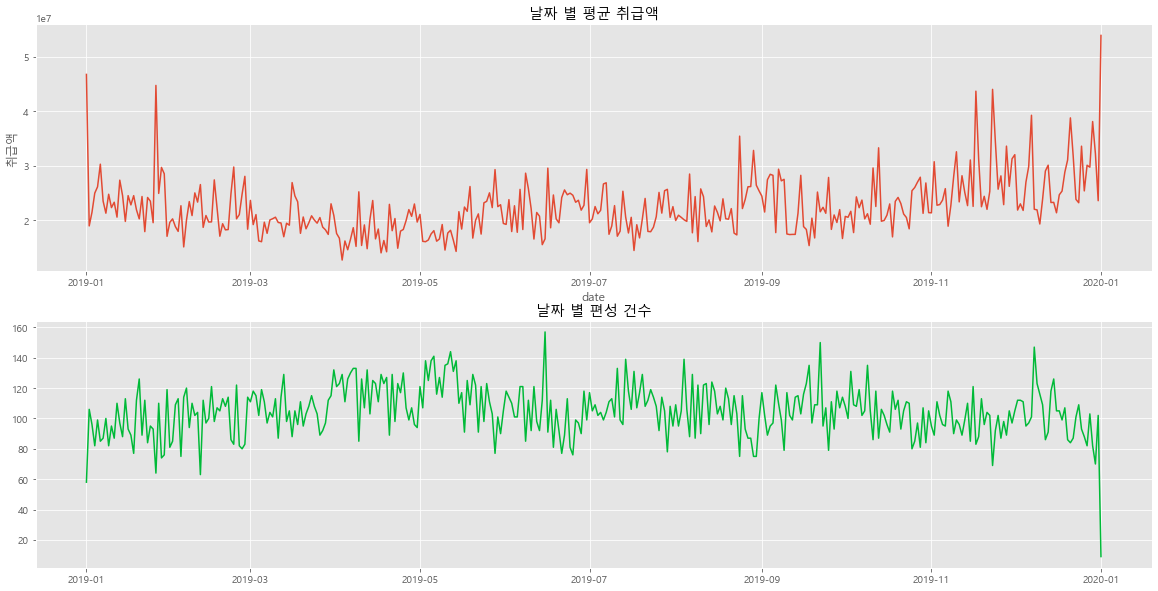

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
sns.lineplot(data=tmp, x='date', y='취급액', ax=ax[0])
sns.lineplot(data=tmp1, color=color_pal[3], ax=ax[1])
ax[0].set_title('날짜 별 평균 취급액')
ax[1].set_title('날짜 별 편성 건수')

## 날짜 별 판매건수

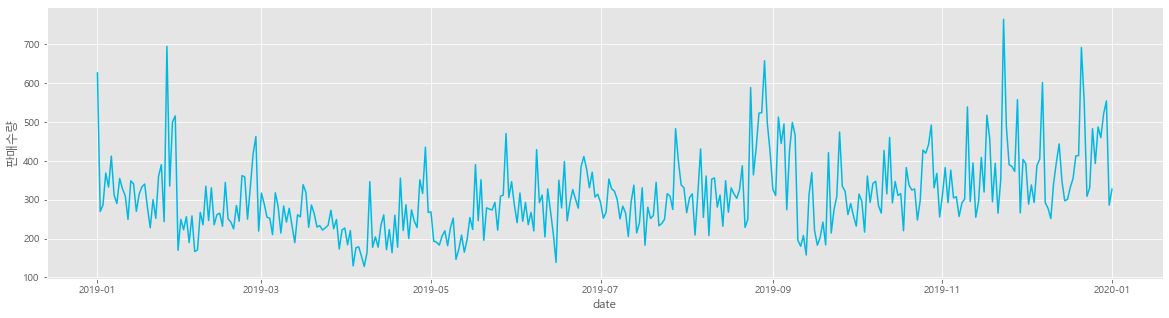

In [61]:
tmp = df.groupby(['date'])[['판매수량']].mean().reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(data=tmp, x='date', y='판매수량', color=color_pal[5])

In [62]:
df.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액', 'date',
       '판매수량'],
      dtype='object')

# 노출 시간 별 상품군

In [83]:
df['노출(분)'].value_counts().head(10)

20.000000    19052
30.000000     1064
10.000000      762
15.000000      117
30.100000       99
60.000000       48
13.000000       40
15.166667       39
17.166667       38
16.683333       20
Name: 노출(분), dtype: int64

Text(0.5, 1.0, '노출 시간 10분')

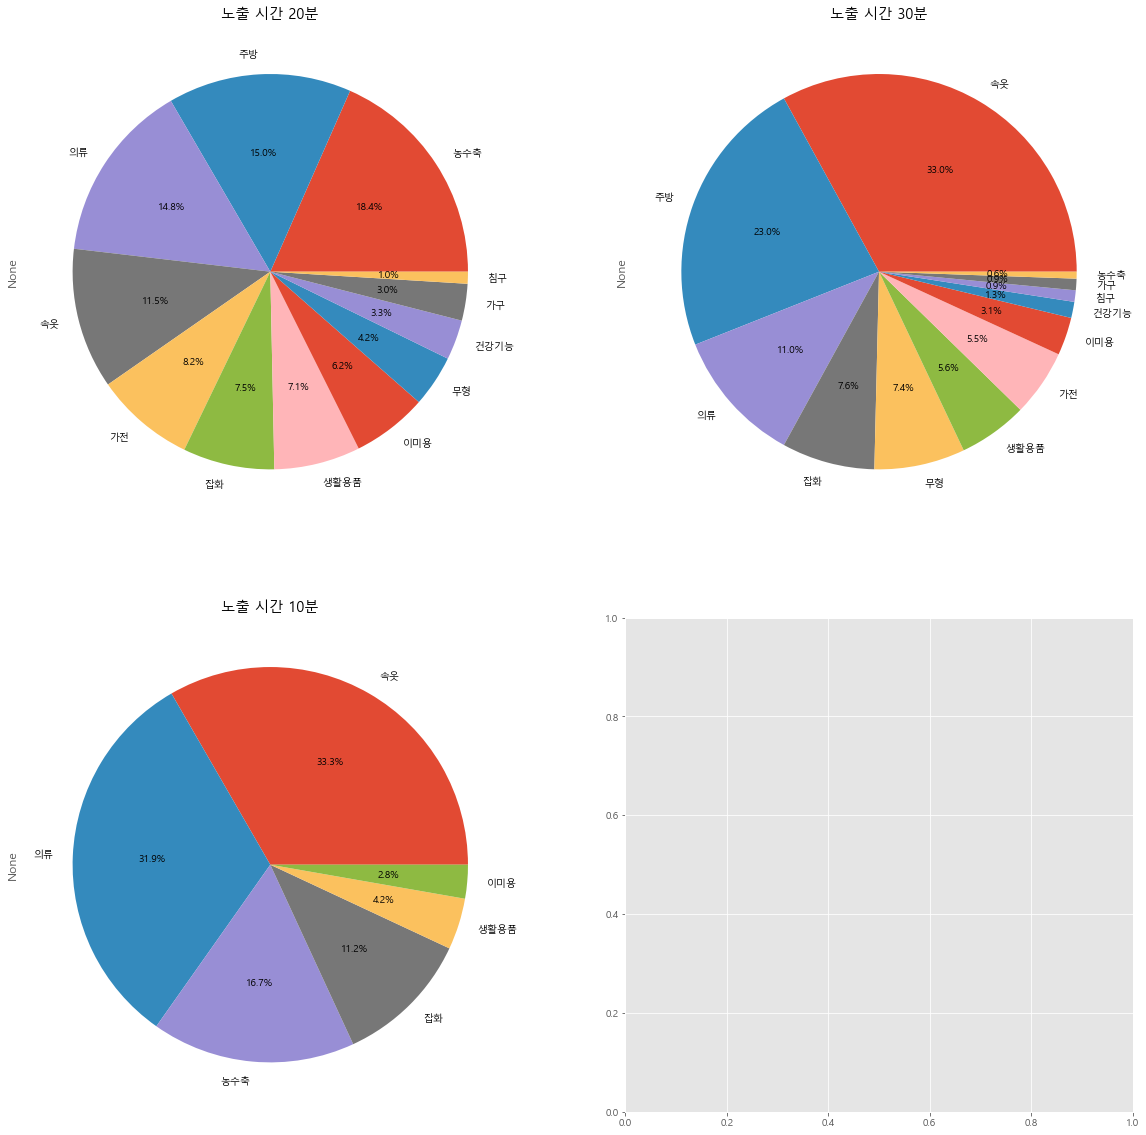

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
df[df['노출(분)']==20.].groupby(['상품군']).size().sort_values(ascending=False).plot.pie(ax=ax[0,0], autopct = "%.1f%%")
ax[0,0].set_title('노출 시간 20분')
df[df['노출(분)']==30.].groupby(['상품군']).size().sort_values(ascending=False).plot.pie(ax=ax[0,1], autopct = "%.1f%%")
ax[0,1].set_title('노출 시간 30분')
df[df['노출(분)']==10.].groupby(['상품군']).size().sort_values(ascending=False).plot.pie(ax=ax[1,0], autopct = "%.1f%%")
ax[1,0].set_title('노출 시간 10분')